### Importando pacotes e análise da base de dados

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# leitura da base de dados
df = pd.read_csv('https://raw.githubusercontent.com/edilton-bs/AV1IntroCD/main/data/dados_bruto.csv')

df.head()

,_id,co_uf,no_uf,ano,variavel,social_categoria,social_subcategoria,valor
0,1,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,24839.0
1,2,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,111275.0
2,3,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,55947.0
3,4,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,31536.0
4,5,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de pessoas cadastradas em famílias ...,37969.0


In [5]:
# valores da coluna social_subcategoria
df['social_subcategoria'].unique()

array(['Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)',
       'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*',
       'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**',
       'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 1*',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 2**',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 3***',
       'Quantidade total de famílias cadastradas',
       'Quantidade total de famílias cadastradas com renda per capita mensal até meio salário mínimo (FAIXAS 1, 2 e 3)*',
       'Quantidade total de pessoas

In [6]:
# valores da variavel
df['variavel'].unique()

array(['Assistência Social'], dtype=object)

In [7]:
# valores da coluna social_categoria
df['social_categoria'].unique()

array(['CadÚnico'], dtype=object)

In [8]:
# valores da coluna ano
df['ano'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

### Gráfico 1 - Quantidade de famílias cadastradas por faixa de renda per capita mensal


| Descrição Longa                                                                                          | Descrição Curta |
|----------------------------------------------------------------------------------------------------------|-----------------|
| Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*                               | FAIXA 1*        |
| Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**                              | FAIXA 2**       |
| Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***                             | FAIXA 3***      |
| Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)| FAIXA 4****     |


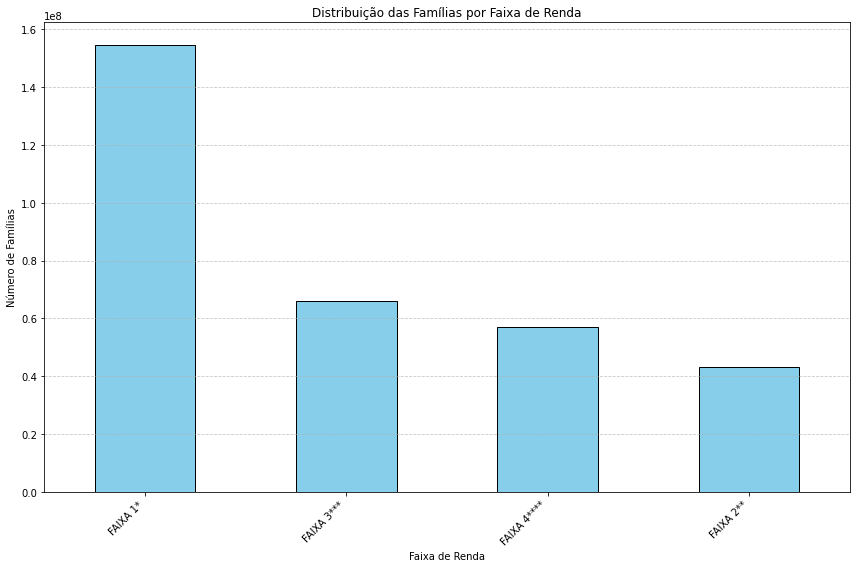

In [11]:
# mapeamento de legendas
mapeamento_legendas = {
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*': 'FAIXA 1*',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**': 'FAIXA 2**',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***': 'FAIXA 3***',
    'Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)': 'FAIXA 4****'
}

faixas_renda = list(mapeamento_legendas.keys())

# Filtrando o dataframe para conter apenas as linhas de interesse
df_faixas = df[df['social_subcategoria'].isin(faixas_renda)]

# Agrupando os dados por subcategoria e somando os valores
grouped = df_faixas.groupby('social_subcategoria').sum()['valor']

# Simplificando as legendas
grouped.index = grouped.index.map(mapeamento_legendas)

# Ordenando os valores (opcional)
grouped = grouped.sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição das Famílias por Faixa de Renda")
plt.ylabel("Número de Famílias")
plt.xlabel("Faixa de Renda")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### Referente ao gráfico 2 - Evolução de famílias cadastradas com membros em situação de trabalho infantil ao longo dos anos

In [25]:
grouped = df_nordeste.groupby(['no_uf', 'ano'])['valor'].sum().unstack()
grouped

ano,2015,2016,2017,2018,2019,2020,2021,2022
no_uf,,,,,,,,
Alagoas,7085.0,5421.0,3528.0,2196.0,1107.0,725.0,365.0,210.0
Bahia,29282.0,19604.0,12381.0,8419.0,3935.0,2431.0,1539.0,883.0
Ceará,4827.0,3198.0,2050.0,1271.0,521.0,280.0,141.0,113.0
Maranhão,20461.0,14655.0,9697.0,5520.0,2533.0,1640.0,1017.0,685.0
Paraíba,13335.0,9571.0,6385.0,4158.0,2122.0,1410.0,899.0,655.0
Pernambuco,19928.0,13051.0,8032.0,4874.0,2192.0,1399.0,818.0,455.0
Piauí,9375.0,6768.0,4697.0,3411.0,1863.0,1249.0,826.0,612.0
Rio Grande do Norte,9494.0,5764.0,3569.0,2349.0,1201.0,778.0,508.0,340.0
Sergipe,3521.0,2164.0,1223.0,809.0,433.0,279.0,224.0,194.0


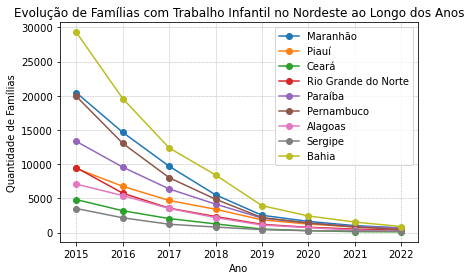

In [26]:

# Para cada estado do Nordeste, plotar a evolução ao longo dos anos
for estado in estados_nordeste:
    plt.plot(grouped.columns, grouped.loc[estado], label=estado, marker='o')

plt.title('Evolução de Famílias com Trabalho Infantil no Nordeste ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Famílias')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Referências**

ChatGPT me deu ideia de fazer o primeiro gráfico e me deu o código de como fazer.

A ideia do segundo gráfico foi minha, mas o ChatGPT que forneceu o código.

Fonte dos dados: *https://dados.gov.br/dados/conjuntos-dados/dados-sociais*, *Dados do CadÚnico por estado*